In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#import geopandas as gpd

#seaborn theme
import seaborn as sns
sns.set()
sns.set(font='Gill Sans MT')

### https://data.calgary.ca/Business-and-Economic-Activity/Building-Permits/c2es-76ed for building permits

In [3]:
b_perm = pd.read_csv('data//Building_Permits.csv')

In [4]:
perm_df = b_perm[['StatusCurrent', 'AppliedDate', 'IssuedDate',
       'CompletedDate', 'PermitType', 'PermitTypeMapped', 'PermitClass',
       'PermitClassGroup', 'PermitClassMapped', 'WorkClass', 'WorkClassGroup',
       'WorkClassMapped', 'Description', 'ContractorName', 'HousingUnits',
       'EstProjectCost']]

In [5]:
perm_df['AppliedDate']=pd.to_datetime(perm_df['AppliedDate'])
perm_df['IssuedDate']=pd.to_datetime(perm_df['IssuedDate'])


c:\Users\Maln\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
c:\Users\Maln\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [6]:
apartment = perm_df[perm_df['PermitClassGroup']=='Apartment']

In [17]:
new_apartment = apartment[(apartment['IssuedDate']>'2020') & (apartment['WorkClass']=='New')] 

In [18]:
new_apartment

,StatusCurrent,AppliedDate,IssuedDate,CompletedDate,PermitType,PermitTypeMapped,PermitClass,PermitClassGroup,PermitClassMapped,WorkClass,WorkClassGroup,WorkClassMapped,Description,ContractorName,HousingUnits,EstProjectCost
367,Issued Permit,2019-11-27,2022-12-05,NaN,Commercial / Multi Family Project,Building,1506 - Apt Apartment,Apartment,Residential,New,New,New,New - Group C - Apartment Building,NaN,103,25013206.0
388,Completed,2021-07-29,2021-09-13,2022/12/05,Commercial / Multi Family Project,Building,1506 - Apt Apartment,Apartment,Residential,New,New,New,"Seton West - Building 4: 4 storey, 56 resident...",LOGEL HOMES,56,8589194.0
702,Issued Permit,2022-09-23,2022-12-07,NaN,Commercial / Multi Family Project,Building,1506 - Apt Apartment,Apartment,Residential,New,New,New,"Truman Westbrook - South Building: 6 storey, 1...",TRUMAN HOMES 1995,100,22140529.0
1158,Issued Permit,2022-08-29,2022-12-08,NaN,Commercial / Multi Family Project,Building,1506 - Apt Apartment,Apartment,Residential,New,New,New,Truman North Building C 6 Storeys Residential,TRUMAN HOMES 1995,136,22259338.0
1432,Completed,2020-12-24,2021-03-16,2023/02/15,Commercial / Multi Family Project,Building,1506 - Apt Apartment,Apartment,Residential,New,New,New,New low-rise apartment building (the Elva).,CENTRON CONSTRUCTION,61,8864309.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
409193,Issued Permit,2022-07-01,2022-08-03,NaN,Commercial / Multi Family Project,Building,1506 - Apt Apartment,Apartment,Residential,New,New,New,"BLOCK 6 - A new 6 unit rowhouse, Part 9, Group...",TRICO HOMES,6,1277247.0
409629,Issued Permit,2022-09-19,2022-11-17,NaN,Commercial / Multi Family Project,Building,1506 - Apt Apartment,Apartment,Residential,New,New,New,Bow 360 4 Storey Residential Building B and Ph...,COVE PROPERTIES BOW 360,70,12766160.0
409964,Issued Permit,2022-07-12,2023-01-27,NaN,Commercial / Multi Family Project,Building,1508 - Apt Fourplex,Apartment,Residential,New,New,New,"4-Plex, Non-stacked Units",MELCOM HOMES,4,943485.0
410404,Issued Permit,2022-06-01,2022-06-17,NaN,Commercial / Multi Family Project,Building,1506 - Apt Apartment,Apartment,Residential,New,New,New,"BLOCK 11 - A new 9 unit, 3 storey rowhouse, Pa...",TRICO HOMES,9,1916309.0


In [20]:
new_apts = apartment[(apartment['WorkClass']=='New')].dropna(subset=['IssuedDate'])

In [21]:
new_apts=new_apts.set_index('IssuedDate')

In [22]:
new_apts

,StatusCurrent,AppliedDate,CompletedDate,PermitType,PermitTypeMapped,PermitClass,PermitClassGroup,PermitClassMapped,WorkClass,WorkClassGroup,WorkClassMapped,Description,ContractorName,HousingUnits,EstProjectCost
IssuedDate,,,,,,,,,,,,,,,
1999-09-08,Completed,1999-08-12,2000/07/12,Commercial / Multi Family Project,Building,1508 - Apt Fourplex,Apartment,Residential,New,New,New,New Four-plex,NaN,4,268000.0
2000-04-20,Completed,2000-02-02,2004/09/30,Commercial / Multi Family Project,Building,1508 - Apt Fourplex,Apartment,Residential,New,New,New,Fourplex dwelliing,NaN,4,256988.0
2019-01-04,Completed,2006-03-09,2022/12/09,Commercial / Multi Family Project,Building,1506 - Apt Apartment,Apartment,Residential,New,New,New,One Tower AB Residential High Building,NaN,379,40000000.0
2022-12-05,Issued Permit,2019-11-27,NaN,Commercial / Multi Family Project,Building,1506 - Apt Apartment,Apartment,Residential,New,New,New,New - Group C - Apartment Building,NaN,103,25013206.0
2021-09-13,Completed,2021-07-29,2022/12/05,Commercial / Multi Family Project,Building,1506 - Apt Apartment,Apartment,Residential,New,New,New,"Seton West - Building 4: 4 storey, 56 resident...",LOGEL HOMES,56,8589194.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-08-03,Issued Permit,2022-07-01,NaN,Commercial / Multi Family Project,Building,1506 - Apt Apartment,Apartment,Residential,New,New,New,"BLOCK 6 - A new 6 unit rowhouse, Part 9, Group...",TRICO HOMES,6,1277247.0
2022-11-17,Issued Permit,2022-09-19,NaN,Commercial / Multi Family Project,Building,1506 - Apt Apartment,Apartment,Residential,New,New,New,Bow 360 4 Storey Residential Building B and Ph...,COVE PROPERTIES BOW 360,70,12766160.0
2023-01-27,Issued Permit,2022-07-12,NaN,Commercial / Multi Family Project,Building,1508 - Apt Fourplex,Apartment,Residential,New,New,New,"4-Plex, Non-stacked Units",MELCOM HOMES,4,943485.0


In [30]:
new_apts.resample('M').sum()['2015':]

,HousingUnits,EstProjectCost
IssuedDate,,
2015-01-31,317,61965125.0
2015-02-28,228,42651398.0
2015-03-31,819,154170720.0
2015-04-30,307,50998898.0
2015-05-31,246,43924011.0
...,...,...
2022-10-31,479,105385910.0
2022-11-30,811,133538858.0
2022-12-31,860,196581548.0


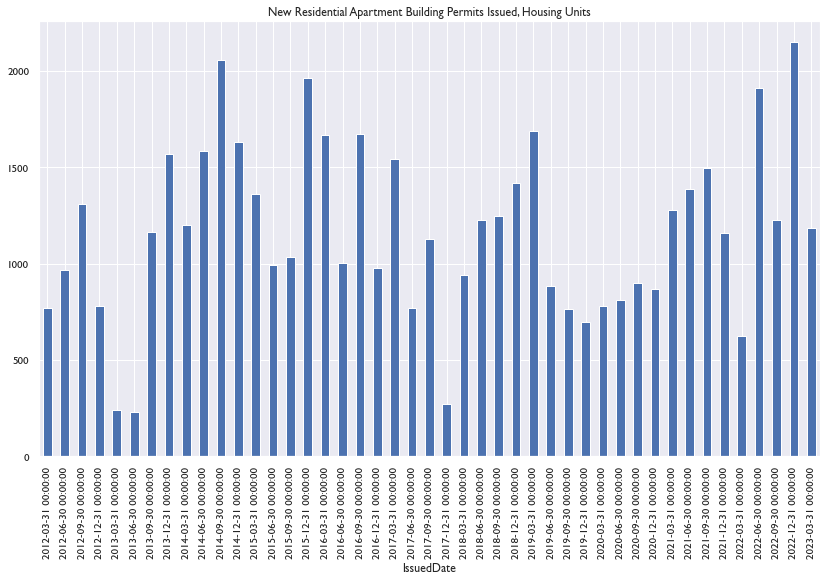

In [34]:
new_apts.resample('Q').sum()['HousingUnits']['2012':].plot(kind='bar',figsize=(14,8),title='New Residential Apartment Building Permits Issued, Housing Units')
plt.savefig('new_apt_housing.png')

In [40]:
from statsmodels.tsa.seasonal import STL
plt.rc("figure", figsize=(16, 10))

c:\Users\Maln\Anaconda3\lib\site-packages\statsmodels\tsa\seasonal.py:338: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.tight_layout()
c:\Users\Maln\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


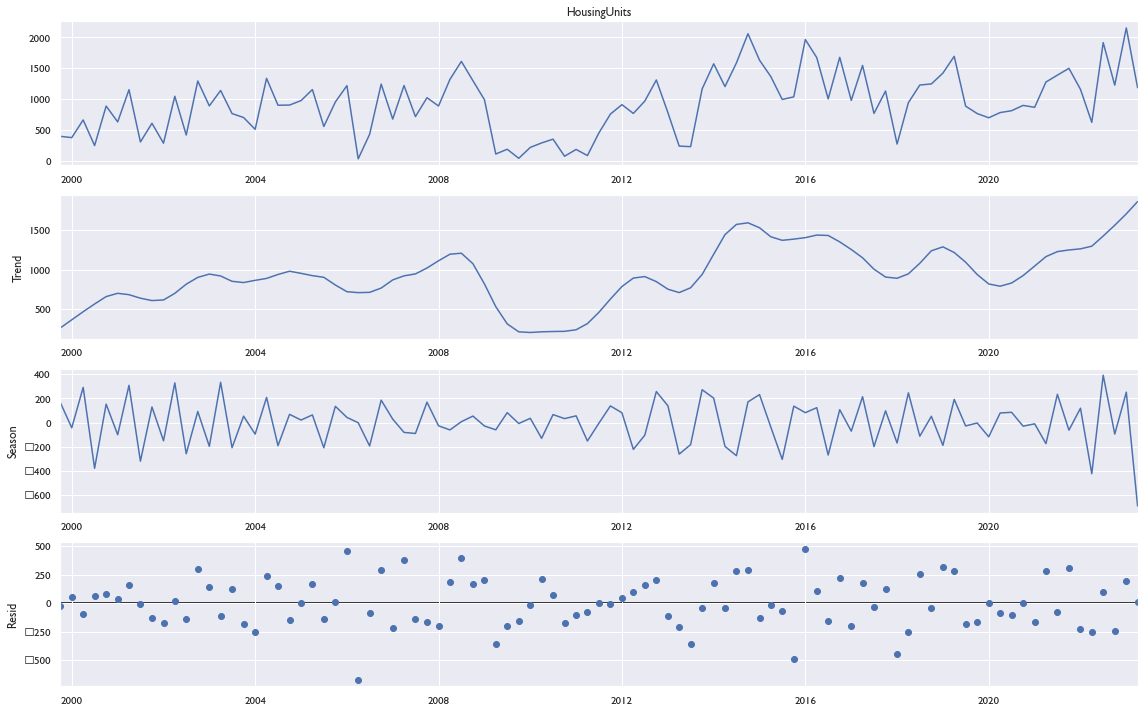

In [41]:
permits_q = new_apts.resample('Q').sum()['HousingUnits']
stl = STL(permits_q, period = 4 )
res=stl.fit()
fig=res.plot()

In [14]:
new_apts = apartment[(apartment['WorkClass']=='New')] 
new_apts=new_apts.set_index('AppliedDate')

In [13]:
new_apts['2015':'2022'].resample('M')['HousingUnits'].sum().plot(kind='bar',figsize=(14,8),title='New Apartment Development Permit Applications, by Total Housing Units')
plt.savefig('apartment_develop_apply.png')

AssertionError: <class 'numpy.ndarray'>

In [80]:
new_apts.resample('Q').count()

,StatusCurrent,IssuedDate,CompletedDate,PermitType,PermitTypeMapped,PermitClass,PermitClassGroup,PermitClassMapped,WorkClass,WorkClassGroup,WorkClassMapped,Description,ContractorName,HousingUnits,EstProjectCost
AppliedDate,,,,,,,,,,,,,,,
1999-09-30,14,14,14,14,14,14,14,14,14,14,14,14,6,14,14
1999-12-31,15,14,15,15,15,15,15,15,15,15,15,13,7,15,14
2000-03-31,18,18,18,18,18,18,18,18,18,18,18,16,8,18,18
2000-06-30,21,20,21,21,21,21,21,21,21,21,21,21,9,21,20
2000-09-30,24,24,24,24,24,24,24,24,24,24,24,21,13,24,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-09-30,13,11,3,13,13,13,13,13,13,13,13,11,6,13,13
2019-12-31,41,24,3,41,41,41,41,41,41,41,41,26,11,41,33
2020-03-31,3,2,0,3,3,3,3,3,3,3,3,2,1,3,3


In [70]:
new_apts['2020']

,StatusCurrent,IssuedDate,CompletedDate,PermitType,PermitTypeMapped,PermitClass,PermitClassGroup,PermitClassMapped,WorkClass,WorkClassGroup,WorkClassMapped,Description,ContractorName,HousingUnits,EstProjectCost
AppliedDate,,,,,,,,,,,,,,,
2020-05-11,Pending Plans Review,NaT,NaN,Commercial / Multi Family Project,Building,1506 - Apt Apartment,Apartment,Residential,New,New,New,NaN,NaN,60,9011395.0
2020-05-11,Pending Plans Review,NaT,NaN,Commercial / Multi Family Project,Building,1506 - Apt Apartment,Apartment,Residential,New,New,New,NaN,NaN,72,10345684.0
2020-05-11,Pending Plans Review,NaT,NaN,Commercial / Multi Family Project,Building,1506 - Apt Apartment,Apartment,Residential,New,New,New,NaN,NaN,59,9010135.0
2020-05-11,Pending Plans Review,NaT,NaN,Commercial / Multi Family Project,Building,1506 - Apt Apartment,Apartment,Residential,New,New,New,NaN,NaN,72,10345684.0
2020-05-06,Issued Permit,2020-05-12,NaN,Commercial / Multi Family Project,Building,1599 - Apt Accessory Building,Apartment,Residential,New,New,New,New Builidng,AVALON MASTER BUILDER,0,14806.0
2020-06-26,Pending Plans Review,NaT,NaN,Commercial / Multi Family Project,Building,1506 - Apt Apartment,Apartment,Residential,New,New,New,NaN,NaN,103,14404780.0
2020-06-26,Pending Plans Review,NaT,NaN,Commercial / Multi Family Project,Building,1506 - Apt Apartment,Apartment,Residential,New,New,New,NaN,NaN,12,2122449.0
2020-03-18,Pending Plans Review,NaT,NaN,Commercial / Multi Family Project,Building,1506 - Apt Apartment,Apartment,Residential,New,New,New,NaN,TRUMAN HOMES,185,19454524.0
2020-07-10,Pending Plans Review,NaT,NaN,Commercial / Multi Family Project,Building,1506 - Apt Apartment,Apartment,Residential,New,New,New,NaN,NaN,154,56212600.0
